<a name="TOP"></a><a href="#END"><font size="0.5">TO THE END</font></a><a name="0.2"></a><br/>

## Exploratory Data Analysis 

## Description

- An online store that sells computer games all over the world
- Historical data on game sales, user and expert ratings, genres and platforms (for example, Xbox or PlayStation) are available from open sources
- It is necessary to identify the attributes that determine the success of the game. This will allow us to bet on a potentially popular product and plan advertising campaigns
- There is data up to 2016. Let's say it's December 2016 and we're planning a campaign for 2017. We need to work out the principle of working with data
- The data set contains the abbreviation ESRB (Entertainment Software Rating Board) - this is an association that determines the age rating of computer games. The ESRB rates game content and assigns it an appropriate age category, such as Adult, Younger Kids, or Teenagers

<a name="Head"></a>

### CONTENTS:

* [Data Source](#1.0)

* [Data Preprocessing](#2.0)

* [Exploratory data analysis](#3.0)
> * [Platforms](#3.1)
> * [Leader Games](#3.2)
> * [Testimonials & Sales: Explore Impact](#3.3)
> * [Portrait of the User of Each Region](#3.4)
> * [Hypothesis Testing](#3.5)

* [Summary and/or recommendations](#4.0)

<a href="#Head"><font size="1.5">BACK TO CONTENTS</font></a><a name="1.0"></a><br/>

## Loading and exploring data

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
import pandas as pd

In [2]:
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 115)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
data = pd.read_csv('games_local_for_eda.csv')

In [4]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.00,Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,nan,NaN,NaN
2,Mario Kart Wii,Wii,2008.00,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,2009.00,Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,nan,NaN,NaN


In [5]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales', 'JP_sales', 'Other_sales',
       'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [7]:
data['Name'].unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

In [8]:
data['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [9]:
data['Year_of_Release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [10]:
data['Year_of_Release'].unique().sum()

nan

In [11]:
data['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [12]:
data['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

### Preprocessing plan:
- replace the column names with lowercase
- remove gaps in the columns "name", "year", "genre", "critics rating", "player rating", "game rating"
- replace tbd with "players rating"

<a href="#Head"><font size="1.5">BACK TO CONTENTS</font></a><a name="2.0"></a><br/>

## Data preprocessing

### Column names (replace to lowercase)

In [13]:
new_columns = ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales',
       'critic_score', 'user_score', 'rating']
data.set_axis(new_columns, axis='columns', inplace = True) 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Processing Null

In [14]:
data.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

#### Null found in columns:
- name : 2
- year_of_release : 269
- genre : 2
- critic_score : 8578
- user_score : 6701
- rating : 6766

In [15]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.00,NaN,1.78,0.53,0.00,0.08,nan,NaN,NaN
14244,NaN,GEN,1993.00,NaN,0.00,0.00,0.03,0.00,nan,NaN,NaN


In [16]:
data[data['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.00,NaN,1.78,0.53,0.00,0.08,nan,NaN,NaN
14244,NaN,GEN,1993.00,NaN,0.00,0.00,0.03,0.00,nan,NaN,NaN


In [17]:
data.drop([659,14244],inplace=True)

In [18]:
data.reset_index(drop=True, inplace=True)

In [19]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [20]:
data['year_of_release'].replace('', np.nan, inplace=True)
data.dropna(subset=['year_of_release'], inplace=True)

In [21]:
data.reset_index(drop=True, inplace=True)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### Two lines were found, in which the given name and genre were absent, given the fact of the absence of defining values and the early year (1993) - decided to delete these two lines.

- the reason for the lack of data is an error in loading data or simply duplication, in which the data was overwritten, but not saved

#### Year of issue - missing values: 269 values.

- after examining the data with the missing release year, I decided to delete these lines, which make up 2% of the base and approx. 1% in the volume of proceeds. I am sure that their absence will not affect decision making during data analysis

In [23]:
data.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

In [24]:
data_nan = data[data.isna().any(axis=1)]
data_nan

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,nan,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,nan,NaN,NaN
5,Tetris,GB,1989.00,Puzzle,23.20,2.26,4.22,0.58,nan,NaN,NaN
9,Duck Hunt,NES,1984.00,Shooter,26.93,0.63,0.28,0.47,nan,NaN,NaN
10,Nintendogs,DS,2005.00,Simulation,9.05,10.95,1.93,2.74,nan,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016.00,Action,0.00,0.00,0.01,0.00,nan,NaN,NaN
16440,LMA Manager 2007,X360,2006.00,Sports,0.00,0.01,0.00,0.00,nan,NaN,NaN
16441,Haitaka no Psychedelica,PSV,2016.00,Adventure,0.00,0.00,0.01,0.00,nan,NaN,NaN
16442,Spirits & Spells,GBA,2003.00,Platform,0.01,0.00,0.00,0.00,nan,NaN,NaN


In [25]:
data['critic_score'] = data['critic_score'].fillna(-1)
data['user_score'] = data['user_score'].fillna(-1)
data['rating'] = data['rating'].fillna(-1)

In [26]:
data['user_score'] = data['user_score'].replace('tbd',-2)

In [27]:
data.isnull().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

#### - replaced the missing values in the columns "criticism", "user rating", "rating" with a value of -1
#### - there are no clear relationships of the missing values with certain groups of observations, except for the year where the data in the "critics' rating" and "user rating" appeared since 1996
#### - tbd: "To Be Determined". Replace it with a value of -2 (in case it will be needed further)

### Data transformation

In [28]:
data['year_of_release'] = data['year_of_release'].astype('int')

In [29]:
data['critic_score'] = data['critic_score'].astype('int')

In [30]:
data['user_score'] = data['user_score'].astype(float)

#### - changed the data type in the "year of release" column from float to int
#### - changed the data type in the column "criticism" from float to int
#### - changed the data type in the "user rating" column from text to number with a dot

### Add a column with total sales for all regions together

In [31]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [32]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.00,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.00,-1,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.30,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.00,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.00,-1,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1.00,-1,0.01
16440,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1,-1.00,-1,0.01
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.00,-1,0.01
16442,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1,-1.00,-1,0.01


<a href="#Head"><font size="1.5">BACK TO CONTENTS</font></a><a name="3.0"></a><br/>

## Exploratory data analysis

### How many games have been released over the years?

In [33]:
game_year_count = data.groupby('year_of_release')['name'].count()

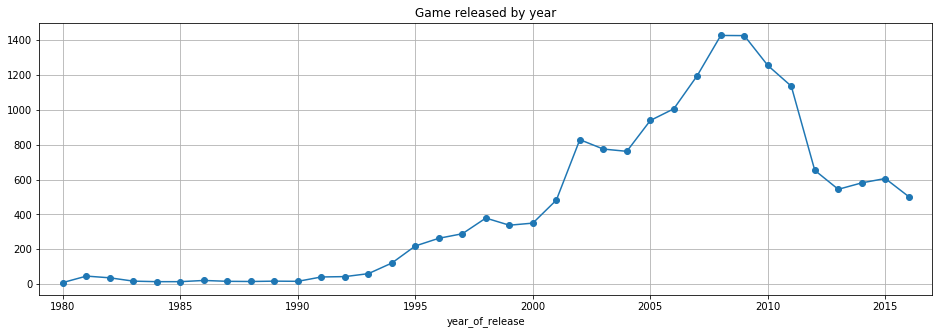

In [34]:
game_year_count.plot(title='Game released by year', style='o-', grid=True, xlim=(1979, 2017), figsize=(16, 5))
plt.show()

##### there has been a change in the number of games released since 2001: until 2001 below 400 per year, after the number did not fall below 400+, maximum 1400+ in 2008 and 2009.

<a href="#Head"><font size="1.5">BACK TO CONTENTS</font></a><a name="3.1"></a><br/>

### Exploring Platforms

In [35]:
platforms_sales = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
platforms_sales

platform
PS2    1233.56
X360    961.24
PS3     931.34
Wii     891.18
DS      802.78
PS      727.58
PS4     314.14
GBA     312.88
PSP     289.53
3DS     257.81
PC      255.76
GB      254.43
XB      251.57
NES     251.05
N64     218.01
SNES    200.04
GC      196.73
XOne    159.32
2600     86.48
WiiU     82.19
PSV      53.81
SAT      33.59
GEN      28.35
DC       15.95
SCD       1.86
NG        1.44
WS        1.42
TG16      0.16
3DO       0.10
GG        0.04
PCFX      0.03
Name: total_sales, dtype: float64

In [36]:
top_7_platform_sales = pd.Series(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4'])
top_7_platform_sales

0     PS2
1    X360
2     PS3
3     Wii
4      DS
5      PS
6     PS4
dtype: object

##### Top 7 platforms by sales are distributed as follows: PS2, X360, PS3, Wii, DS, PS, PS4 (4 of them are owned by Sony).

### Development of top platforms over the years

In [37]:
top_7_platform_data = data.query('platform in ("PS2", "X360", "PS3", "Wii", "DS", "PS", "PS4")')
#top_7_platform_data['platform'].value_counts()

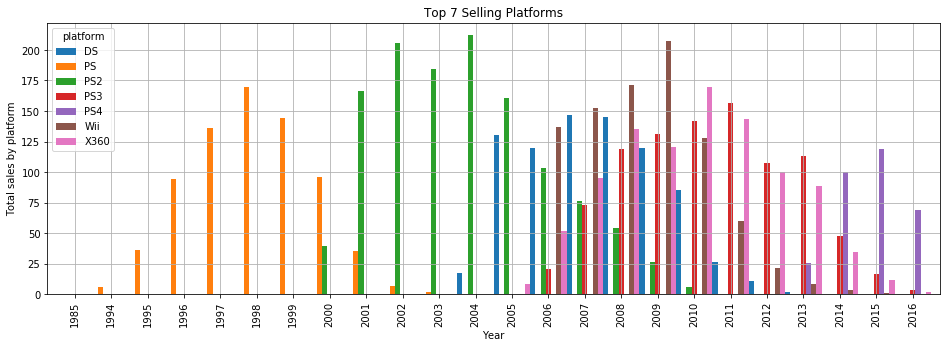

In [38]:
top_7_platform_data.pivot_table(index='year_of_release',
                                columns='platform',
                                values='total_sales',
                                aggfunc='sum').plot(kind='bar',grid=True,figsize=(16,5),width=1)
plt.title('Top 7 Selling Platforms');
plt.ylabel('Total sales by platform');
plt.xlabel('Year');

#### or line-chart for better visualisation:

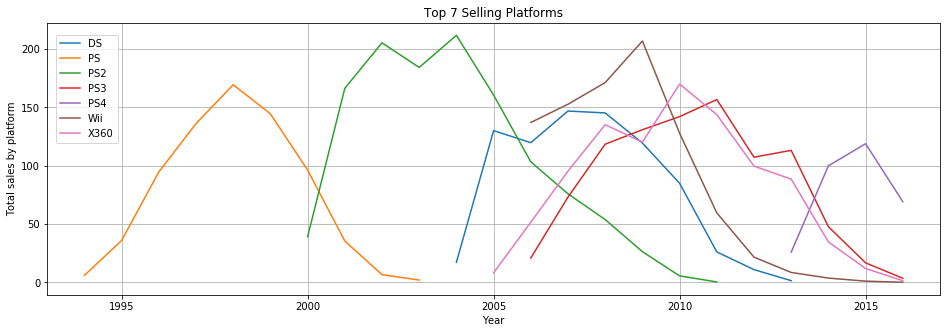

In [39]:
top_7_platform_data.pivot_table(index='year_of_release',
                                columns='platform',
                                values='total_sales',
                                aggfunc='sum').plot(kind='line',grid=True,figsize=(16,5))
plt.xlim([1993, 2017])
plt.legend(loc=(0.01, 0.56))
plt.title('Top 7 Selling Platforms');
plt.ylabel('Total sales by platform');
plt.xlabel('Year');

#### Based on sales, the average lifespan of a platform is 10 years.
#### This graph shows that PS4 will definitely exist in 2017.

### Fetching data for further analysis, "current period"

#### to determine the current period, I will build a graph based on 50% of the average life cycle of a platform: minus 5 years from 2016, we will make a cut from 2011 to 2016 (I take 50% in order to see exactly which platforms are running out and which there is still room to grow).

In [40]:
platform_2011_16_data = data.query('year_of_release in ("2011", "2012", "2013", "2014", "2015", "2016")')

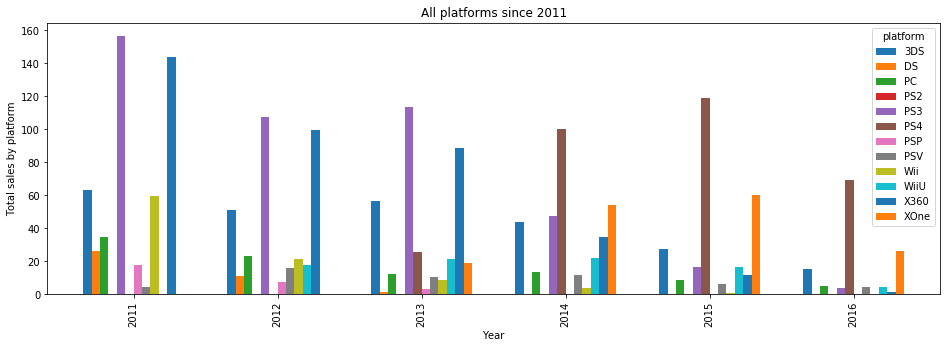

In [41]:
platform_2011_16_data.pivot_table(index='year_of_release',
                                columns='platform',
                                values='total_sales',
                                aggfunc='sum').plot(kind='bar',grid=False,figsize=(16,5),width=0.7)
plt.title('All platforms since 2011');
plt.ylabel('Total sales by platform');
plt.xlabel('Year');

#### Based on the data, we see that in 2016 PS4, XOne have strong positions. The rest of the platforms are losing their relevance, but new ones have not appeared. These platforms took the lead in 2014. I propose to choose this year as a starting point and determine the period in 2014-2016.

<a href="#Head"><font size="1.5">BACK TO CONTENTS</font></a><a name="3.2"></a><br/>

### Leader games

##### the period from 2014 to 2016 inclusively covers 978 dataset lines

In [42]:
platform_2014_16_data = data.query('year_of_release in ("2014", "2015", "2016")')
platform_2014_16_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.00,-1,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.30,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,-1,-1.00,-1,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.30,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,-1,-1.00,-1,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16432,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.00,-1,0.01
16436,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1,-1.00,-1,0.01
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1.00,-1,0.01
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.00,-1,0.01


In [43]:
games_Y14_Y16_sales = platform_2014_16_data.pivot_table(index=['name'],
                                                        values='total_sales',aggfunc='sum')
games_Y14_Y16_sales.sort_values(by=['total_sales'], ascending=False).head(15)

,total_sales
name,
Call of Duty: Black Ops 3,25.67
Call of Duty: Advanced Warfare,21.97
Grand Theft Auto V,19.26
FIFA 15,17.37
FIFA 16,16.30
Minecraft,14.98
Fallout 4,12.67
Destiny,12.54
Super Smash Bros. for Wii U and 3DS,12.42


In [44]:
top_12_games_sales = pd.Series(['Call of Duty: Black Ops 3', 'Call of Duty: Advanced Warfare', 'Grand Theft Auto V',
                               'FIFA 15', 'FIFA 16', 'Minecraft',
                               'Fallout 4','Destiny','Super Smash Bros. for Wii U and 3DS',
                               'Star Wars Battlefront (2015)','Pokemon Omega Ruby/Pokemon Alpha Sapphire','FIFA 17'])
top_12_games_sales

0                     Call of Duty: Black Ops 3
1                Call of Duty: Advanced Warfare
2                            Grand Theft Auto V
3                                       FIFA 15
4                                       FIFA 16
5                                     Minecraft
6                                     Fallout 4
7                                       Destiny
8           Super Smash Bros. for Wii U and 3DS
9                  Star Wars Battlefront (2015)
10    Pokemon Omega Ruby/Pokemon Alpha Sapphire
11                                      FIFA 17
dtype: object

##### Top 12 games include 3 FIFA games, 2 Call of Duty games.

In [45]:
# select the top5 platforms in a separate list
top_5_platform = data.query('year_of_release >= 2014').groupby(['platform'],
            as_index = False)['total_sales'].sum().sort_values('total_sales',
                                ascending = False).head(5)['platform'].tolist()
top_5_platform

['PS4', 'XOne', '3DS', 'PS3', 'X360']

In [46]:
top_5_platform_sales = data.query('year_of_release >= 2014').groupby(['platform'],
            as_index = False)['total_sales'].sum().sort_values('total_sales',
                                ascending = False).head(5)
top_5_platform_sales

,platform,total_sales
3,PS4,288.15
9,XOne,140.36
0,3DS,86.68
2,PS3,68.18
8,X360,48.22


### Top 5 Platforms Descending: PS4, XOne, 3DS, PS3, X360
#### two leading platforms close 68% of sales (429 out of 632).

[(0, 3)]

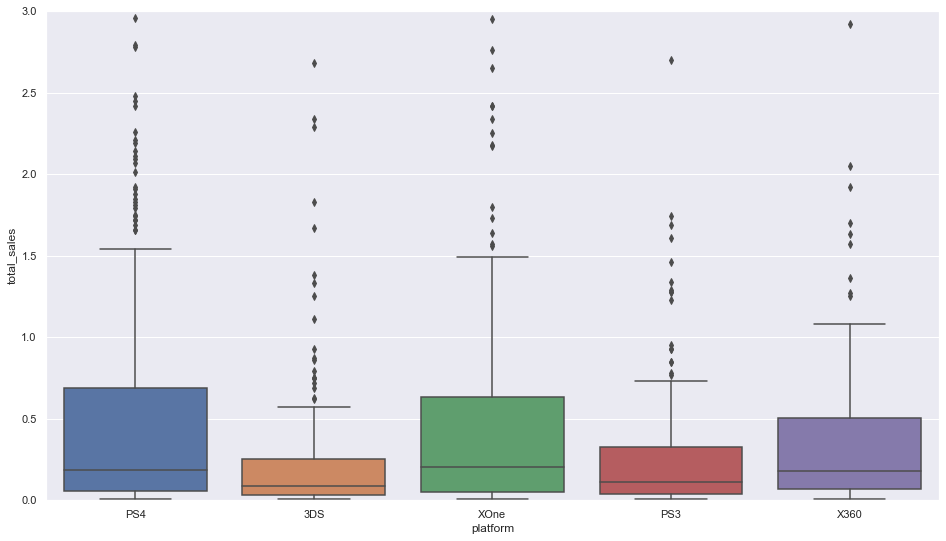

In [47]:
sns.set(rc={'figure.figsize':(16,9)}) # настройка размера графика в jupyter
ax = sns.boxplot(x='platform', y='total_sales', data=platform_2014_16_data.query('platform in @top_5_platform'))
ax.set(ylim=(0,3))

#### The first 3 leading platforms (PS4, XOne, X360) have similar average values ... PS4 and XOne are very similar in terms of distribution of game sales.
#### 3DS and PS3 are inferior not only in terms of sales - the average values are at least two times lower than the leaders.

### Explore how games are distributed across platforms

In [48]:
top_12_games = data.query('year_of_release >= 2014').groupby(['name'],
            as_index = False)['total_sales'].sum().sort_values('total_sales',
                                ascending = False).head(12)['name'].tolist()
top_12_games

['Call of Duty: Black Ops 3',
 'Call of Duty: Advanced Warfare',
 'Grand Theft Auto V',
 'FIFA 15',
 'FIFA 16',
 'Minecraft',
 'Fallout 4',
 'Destiny',
 'Super Smash Bros. for Wii U and 3DS',
 'Star Wars Battlefront (2015)',
 'Pokemon Omega Ruby/Pokemon Alpha Sapphire',
 'FIFA 17']

In [49]:
top_12_games_sales = data.query('year_of_release >= 2014').groupby(['name'],
            as_index = False)['total_sales'].sum().sort_values('total_sales',
                                ascending = False).head(12)
top_12_games_sales

,name,total_sales
109,Call of Duty: Black Ops 3,25.67
108,Call of Duty: Advanced Warfare,21.97
328,Grand Theft Auto V,19.26
255,FIFA 15,17.37
256,FIFA 16,16.30
502,Minecraft,14.98
260,Fallout 4,12.67
165,Destiny,12.54
768,Super Smash Bros. for Wii U and 3DS,12.42
741,Star Wars Battlefront (2015),12.19


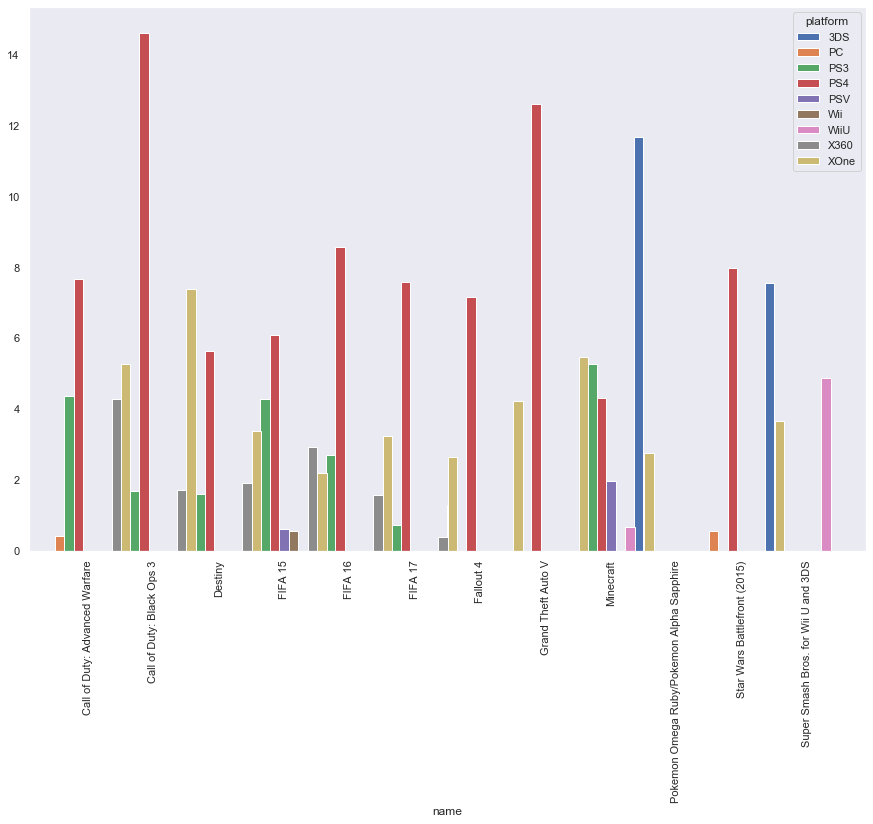

In [50]:
platform_2014_16_data.query('name in @top_12_games').pivot_table(index='name',
                               columns='platform',values='total_sales', 
                               aggfunc='sum', fill_value=0).plot(kind="bar"
                            ,grid=False,figsize=(15,10), width=1.3)
plt.show()

#### PS4 is the leader as a platform for almost all games, in 75% of cases (except for Pokemon - 3DS and Super Smash Bros. for 3DS & WiiU - 3DS, which is logical from the name); XOne ranks second in 66% of cases; further high places share: DS3, PS3, X360 and PC.

<a href="#Head"><font size="1.5">BACK TO CONTENTS</font></a><a name="3.3"></a><br/>

### Testimonials & Sales: Explore Impact

In [51]:
score_vs_sales_PS4 = data.query('year_of_release >= 2014 and platform == "PS4"').pivot_table(index='name',
                               columns='platform',values=['critic_score','user_score','total_sales'], 
                               aggfunc='sum')
score_vs_sales_PS4.columns = ['critic_score', 'total_sales','user_score']

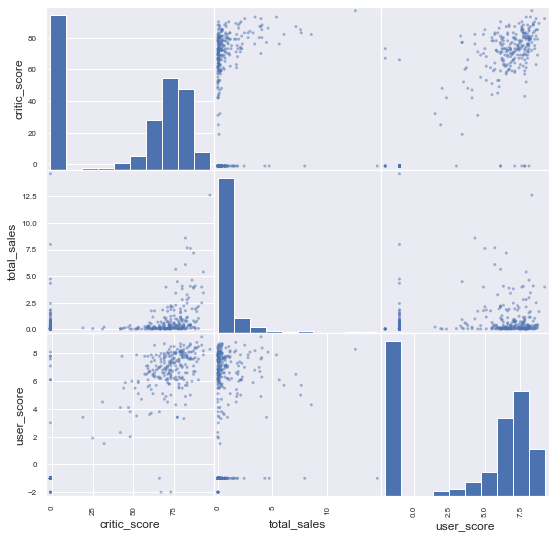

In [52]:
pd.plotting.scatter_matrix(score_vs_sales_PS4, figsize=(9, 9))
plt.show()

In [53]:
score_vs_sales_PS4.corr()

,critic_score,total_sales,user_score
critic_score,1.00,0.21,0.91
total_sales,0.21,1.00,0.11
user_score,0.91,0.11,1.00


#### Critic Reviews and Sales: Regardless of high critical scores, sales can be low or high; here the opposite effect is likely - the higher the sales, the better the critics' score.
#### Player feedback and sales: the situation is similar to the previous comment - there are high scores from players, but low sales.
#### The correlation formula confirms the conclusion above - the correlation "reviews" vs "sales" is very low.

#### Let's check the approach on the XOne platform

In [54]:
score_vs_sales_XOne = data.query('year_of_release >= 2014 and platform == "XOne"').pivot_table(index='name',
                               columns='platform',values=['critic_score','user_score','total_sales'], 
                               aggfunc='sum')
score_vs_sales_XOne.columns = ['critic_score', 'total_sales','user_score']

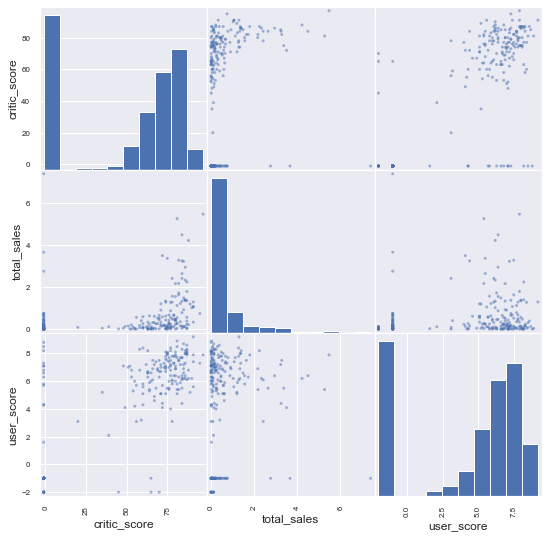

In [55]:
pd.plotting.scatter_matrix(score_vs_sales_XOne, figsize=(9, 9))
plt.show()

In [56]:
score_vs_sales_XOne.corr()

,critic_score,total_sales,user_score
critic_score,1.00,0.27,0.80
total_sales,0.27,1.00,0.11
user_score,0.80,0.11,1.00


#### The XOne platform data correlation formula confirms the conclusion above - the "reviews" vs "sales" correlation is very low.

### Studying the dependence of sales on the genre of the game

In [57]:
genre_number = data.query('year_of_release >= 2014').groupby(['genre'],
            as_index = False)['total_sales'].count().sort_values('total_sales',
                                ascending = False).set_index('genre')

#genre_number

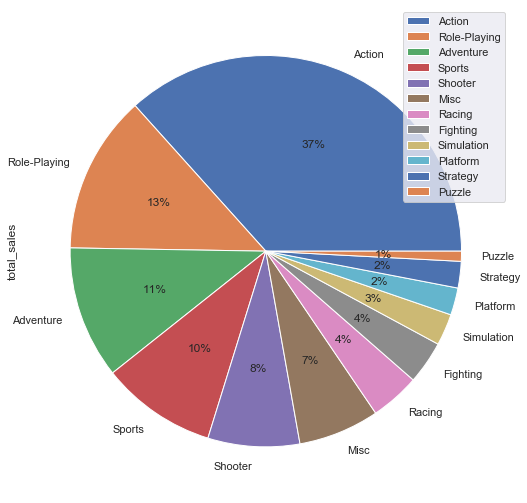

In [58]:
genre_number.plot(kind='pie', y='total_sales', autopct='%1.0f%%', figsize=(9,9))
plt.show()

#### games in the genres prevail quantitatively: Action, Role-Playing, Adventure, Sports, Shooter.
#### Action, Role-Playing genres occupy 50% share in the number of games.

In [59]:
genre_sales = data.query('year_of_release >= 2014').groupby(['genre'],
            as_index = False)['total_sales'].sum().sort_values('total_sales',
                                ascending = False).set_index('genre')

#genre_sales

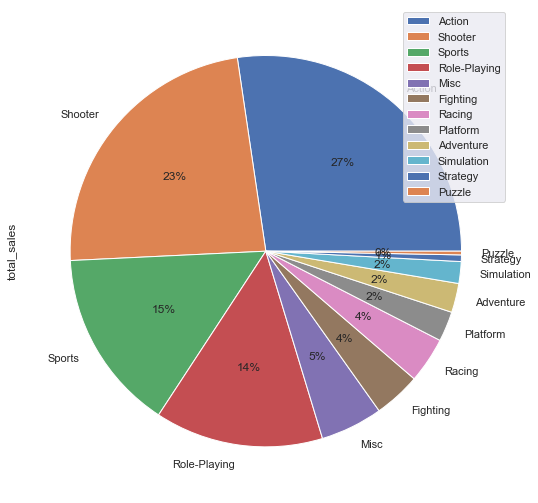

In [60]:
genre_sales.plot(kind='pie', y='total_sales', autopct='%1.0f%%', figsize=(9,9))
plt.show()

#### in terms of sales share Action genre remains among the leaders = 27%, Shooter takes second place with 23% share (5th place in the list in terms of quantity), Sports - third place with 15% share in sales.
#### these three genres together account for 66% in sales and 54% in quantitative terms.
#### If you look from the support point of view, there are 4 genres that will cover most of the segments: Action, Shooter, Sports and Role-Playing - 80% in sales and 67% in terms of quantity.

<a href="#Head"><font size="1.5">BACK TO CONTENTS</font></a><a name="3.4"></a><br/>

## Let's create a portrait of the user of each region

### Popular platforms by region

          na_sales
platform          
PS4          98.61
XOne         81.27
X360         28.30
3DS          22.64
PS3          22.05


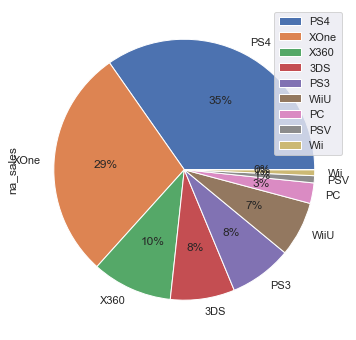

In [61]:
top_platform_na = data.query('year_of_release >= 2014').groupby(['platform'],
            as_index = False)['na_sales'].sum().sort_values('na_sales',
                                ascending = False).head(12).set_index('platform')
print(top_platform_na.head(5))
top_platform_na.plot(kind='pie', y='na_sales', autopct='%1.0f%%', subplots=True, figsize=(15,6))
plt.show()

          eu_sales
platform          
PS4         130.04
XOne         46.25
PS3          25.54
PC           17.97
3DS          16.12


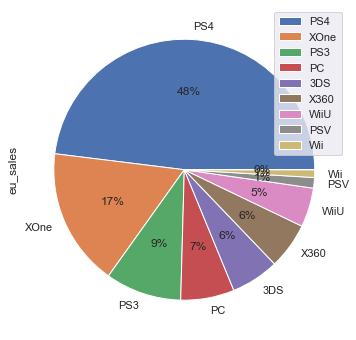

In [62]:
top_platform_eu = data.query('year_of_release >= 2014').groupby(['platform'],
            as_index = False)['eu_sales'].sum().sort_values('eu_sales',
                                ascending = False).head(12).set_index('platform')
print(top_platform_eu.head(5))
top_platform_eu.plot(kind='pie', y='eu_sales', autopct='%1.0f%%', subplots=True, figsize=(15,6))
plt.show()

          jp_sales
platform          
3DS          44.24
PS4          15.02
PSV          14.54
PS3          11.22
WiiU          7.31


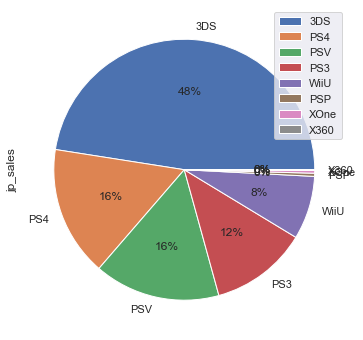

In [63]:
top_platform_jp = data.query('year_of_release >= 2014').groupby(['platform'],
            as_index = False)['jp_sales'].sum().sort_values('jp_sales',
                                ascending = False).head(12).set_index('platform')
print(top_platform_jp.head(5))
top_platform_jp.plot(kind='pie', y='jp_sales', autopct='%1.0f%%', subplots=True, figsize=(15,6))
plt.show()

#### Statistics of popular platforms by region (sales share) show that PS4 leads in North America and Europe, while in Japan 3DS leads.
#### XOne is doing well in S.A and Europe, but not popular in Japan (not in the top 5).
#### PS3 remains popular in all 3 regions.

### Popular genres by region

              na_sales
genre                 
Shooter          79.02
Action           72.53
Sports           46.13
Role-Playing     33.47
Misc             15.05


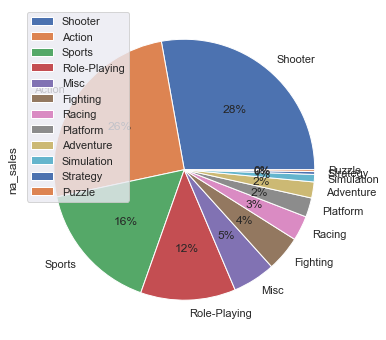

In [64]:
top_genre_na = data.query('year_of_release >= 2014').groupby(['genre'],
            as_index = False)['na_sales'].sum().sort_values('na_sales',
                                ascending = False).head(12).set_index('genre')
print(top_genre_na.head(5))
top_genre_na.plot(kind='pie', y='na_sales', autopct='%1.0f%%', subplots=True, figsize=(15,6))
plt.show()

              eu_sales
genre                 
Action           74.68
Shooter          65.52
Sports           45.73
Role-Playing     28.17
Racing           14.13


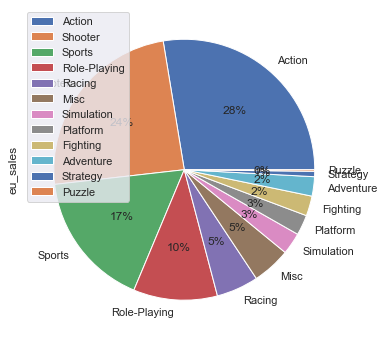

In [65]:
top_genre_eu = data.query('year_of_release >= 2014').groupby(['genre'],
            as_index = False)['eu_sales'].sum().sort_values('eu_sales',
                                ascending = False).head(12).set_index('genre')
print(top_genre_eu.head(5))
top_genre_eu.plot(kind='pie', y='eu_sales', autopct='%1.0f%%', subplots=True, figsize=(15,6))
plt.show()

              jp_sales
genre                 
Role-Playing     31.16
Action           29.58
Fighting          6.37
Misc              5.61
Shooter           4.87


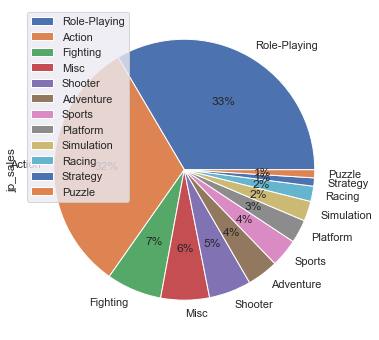

In [66]:
top_genre_jp = data.query('year_of_release >= 2014').groupby(['genre'],
            as_index = False)['jp_sales'].sum().sort_values('jp_sales',
                                ascending = False).head(12).set_index('genre')
print(top_genre_jp.head(5))
top_genre_jp.plot(kind='pie', y='jp_sales', autopct='%1.0f%%', subplots=True, figsize=(15,6))
plt.show()

#### By genres, the situation varies from continent to continent (North America and Europe are similar): North America loves to play "Shooters", "Action" and "Sports"; Europe - the leaders change places: "Shooters" in second, and "Action" in first place, then "Sports". On the fourth place on these continents "RPGs".
#### Japan - "Role-playing games" in the first place, then "Action", then "Combat", and "Shooters" further by margin.
#### While the first two continents have a fairly even distribution, in Japan the first two genres occupy 2/3 of the market.

### Impact of ESRB rating on sales in regions

        na_sales
rating          
M          96.42
-1         64.72
E          50.74
T          38.95
E10+       33.23


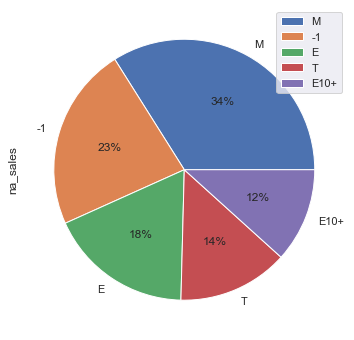

In [67]:
esrb_na = data.query('year_of_release >= 2014 and rating != "-1"').groupby(['rating'],
            as_index = False)['na_sales'].sum().sort_values('na_sales',
                                ascending = False).head(6).set_index('rating')
print(esrb_na.head(6))

esrb_na.plot(kind='pie', y='na_sales', autopct='%1.0f%%', subplots=True, figsize=(15,6))
plt.show()

        eu_sales
rating          
M          93.44
-1         58.95
E          58.06
T          34.07
E10+       26.16


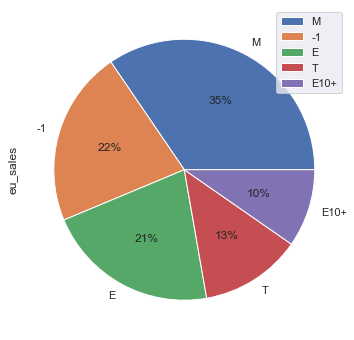

In [68]:
esrb_eu = data.query('year_of_release >= 2014 and rating != "-1"').groupby(['rating'],
            as_index = False)['eu_sales'].sum().sort_values('eu_sales',
                                ascending = False).head(6).set_index('rating')
print(esrb_eu.head(6))

esrb_eu.plot(kind='pie', y='eu_sales', autopct='%1.0f%%', subplots=True, figsize=(15,6))
plt.show()

        jp_sales
rating          
-1         56.90
T          14.78
E           8.94
M           8.01
E10+        4.46


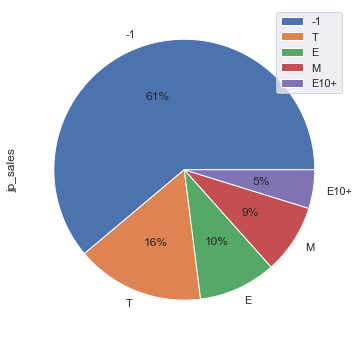

In [69]:
esrb_jp = data.query('year_of_release >= 2014 and rating != "-1"').groupby(['rating'],
            as_index = False)['jp_sales'].sum().sort_values('jp_sales',
                                ascending = False).head(6).set_index('rating')
print(esrb_jp.head(6))

esrb_jp.plot(kind='pie', y='jp_sales', autopct='%1.0f%%', subplots=True, figsize=(15,6))
plt.show()

#### North America and Europe show very similar results - which is logical due to the proximity of countries in cultural and social characteristics (sorted according to the severity of the rating):
#### Mature (M) - 44%, Teen (T) - 16-18%, Everyone 10+ (E10 +) - 12-15%, Everyone (E) - 23-27%
#### Japan: strong positions in the Teen rating stand out = 41%. The two groups of games rated Teen and Everyone account for 66% of the market, which confirms the conclusions above about the two large groups "RPG" and "Action".
#### It can be assumed that rating affects sales, or rather the production of games. In order to reach more users in genres like Shooter and Action, games need to be hailed as less violent. For example, the share of sales of the genres "Shooter" and "Action" in North America is 54%, and the Mature rating = 44%, apparently some of the games are made under the Teen and 10+ rating in order to collect more revenue.

<a href="#Head"><font size="1.5">BACK TO CONTENTS</font></a><a name="3.5"></a><br/>

## Hypothesis testing

### Average user ratings for Xbox One and PC platforms are the same

- Null hypothesis: average ratings of "Xbox One" users are equal to average ratings of "PC" users
- Alternative hypothesis: average ratings of "Xbox One" users are higher than average ratings of "PC": H1! = H0
- Comparison of the two databases and the probability of getting the mean from the sample "Xbox One" is higher than the significance level

In [70]:
user_score_xone = data.query('year_of_release >= 2014 and user_score != -1 and user_score != -2 and platform == "XOne"')
user_score_pc = data.query('year_of_release >= 2014 and user_score != -1 and user_score != -2 and platform == "PC"')

In [71]:
print(len(user_score_xone))
print(len(user_score_pc))

165
122


In [72]:
user_score_xone_mean = user_score_xone['user_score'].mean()
print(user_score_xone_mean)
user_score_pc_mean = user_score_pc['user_score'].mean()
print(user_score_pc_mean)

6.594545454545453
6.298360655737703


In [73]:
sample_xone = user_score_xone['user_score'].tolist()
sample_pc = user_score_pc['user_score'].tolist()

alpha = .05

results = st.ttest_ind(
    sample_xone, 
    sample_pc)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print(
"The null hypothesis where the average ratings of Xbox One users are equal to the average ratings of PC users is rejected")
else:
    print(
"The null hypothesis where the average ratings of Xbox One users are equal to the average ratings of PC users is not rejected")

p-значение: 0.10450507919348415
The null hypothesis where the average ratings of Xbox One users are equal to the average ratings of PC users is not rejected


#### hypothesis where the average user ratings of the Xbox One and PC platforms are the same - confirmed.

### Average user ratings of the genres Action and Sports are different

- Null hypothesis: average ratings of "Action" users are equal to average ratings of "Sports" users
- Alternative hypothesis: average ratings of "Action" users are higher than average ratings of "Sports": H1> H0
- Let's set the condition that the probability of getting into the average "Sports" will be less than 5% and the average "Action" will be higher than the average of the sample "Sports"

In [74]:
user_score_action = data.query('year_of_release >= 2014 and user_score != -1 and user_score != -2 and genre == "Action"')
user_score_sports = data.query('year_of_release >= 2014 and user_score != -1 and user_score != -2 and genre == "Sports"')

In [75]:
print(len(user_score_action))
print(len(user_score_sports))

297
127


In [76]:
user_score_action_mean = user_score_action['user_score'].mean()
print(user_score_action_mean)
user_score_sports_mean = user_score_sports['user_score'].mean()
print(user_score_sports_mean)

6.760606060606054
5.225196850393697


In [77]:
sample_action = user_score_action['user_score'].tolist()
sample_sports = user_score_sports['user_score'].tolist()

alpha = .05 # critical level of statistical significance
            # if the p-value is less than it, we reject the hypothesis

results = st.ttest_ind(
    sample_action, 
    sample_sports)

print('p-значение:', results.pvalue / 2)

if (results.pvalue < alpha) and (user_score_sports_mean < user_score_action_mean):
    print(
"The null hypothesis where the average ratings of Action users are equal to the average ratings of Sports users is rejected")
else:
    print(
"The null hypothesis where the average ratings of Action users are equal to the average ratings of Sports users is not rejected")

p-значение: 1.4355573992552932e-19
The null hypothesis where the average ratings of Action users are equal to the average ratings of Sports users is rejected


#### The hypothesis where the average ratings of Action users are equal to the average ratings of Sports users is rejected.
- which confirms the assumption that Average user ratings for the genres Action and Sports are different

<a href="#Head"><font size="1.5">BACK TO CONTENTS</font></a><a name="4.0"></a><br/>

## General conclusion

### The main task that was being solved in this project was to identify the attributes that determine the success of the game. This will allow us to bet on a potentially popular product and plan advertising campaigns.
#### The success of the game in this case was determined primarily by "platform", "genre", "rating" and "sales history"
#### For planning advertising support in 2017, I propose to take games on PS4 and XOne - North America and Europe; 3DS and PS4 - Japan
#### Support Genres: Shooter, Action, Sports - North America and Europe; Role-Playing, Action, Fighting - Japan
#### Rating of games: Mature and Everyone - in the North. America and Europe; and Teen and Everyone - to Japan
#### Successful Support Games:
##### (here we need to track the dynamics of leaders and sales of new games, which are not selling very well yet, but show year-on-year growth since 2015):
- Call of Duty: Black Ops 3
- Call of Duty: Advanced Warfare
- Grand Theft Auto V
- FIFA 15
- FIFA 16
- Minecraft
- Fallout 4
- Destiny
- Super Smash Bros. for Wii U and 3DS
- Star Wars Battlefront (2015)
- Pokemon Omega Ruby/Pokemon Alpha Sapphire
- FIFA 17

<a href="#TOP"><font size="0.5">TO THE TOP</font></a><a name="END"></a><br/>